In [1]:
# %matplotlib qt 
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import os
import h5py
import sys

In [4]:
sys.path.append('/dls/science/groups/e02/Mohsen/code/Git_Repos/My_Repository/ptyREX_sim_matrix/')

In [5]:
from sim_utils import *
from sim_utils import _sigma
from recon_utils import *

In [6]:
matrix_path = '/dls/e02/data/2020/cm26481-1/processing/pty_simulated_data_MD/sim_matrix_ptyREX_v2/'
json_files = get_ptyREX_recon_list(matrix_path)

In [7]:
len(json_files)

70

In [8]:
# sorting the json files
conv_angles = [0.016, 0.020, 0.030, 0.050, 0.064, 0.084]
diff_overlap = [-22.5, 1.99, 34.70, 60.80, 69.37, 76.67]
real_probe_overlap = [-20, 2, 35, 60, 70, 80]


focus_probes_dict = []
defocus_probes_dict = []
for file in json_files:
    j_dict = json_to_dict(file)
    if j_dict['experiment']['optics']['lens']['defocus'][0] == 0.00:
        for i, angle in enumerate(conv_angles):
            focus_probes_dict.append([])
            if j_dict['process']['common']['probe']['convergence'] == angle:
                focus_probes_dict[i].append(j_dict)
    else:
        for i, angle in enumerate(conv_angles):
            defocus_probes_dict.append([])
            if j_dict['process']['common']['probe']['convergence'] == angle:
                defocus_probes_dict[i].append(j_dict)
                
for i, angle in enumerate(conv_angles):
    #print(angle)
    focus_probes_dict[i].sort(key=lambda e: e['process']['common']['scan']['dR'][0], reverse = True)
    defocus_probes_dict[i].sort(key=lambda e: e['process']['common']['scan']['dR'][0], reverse = True)

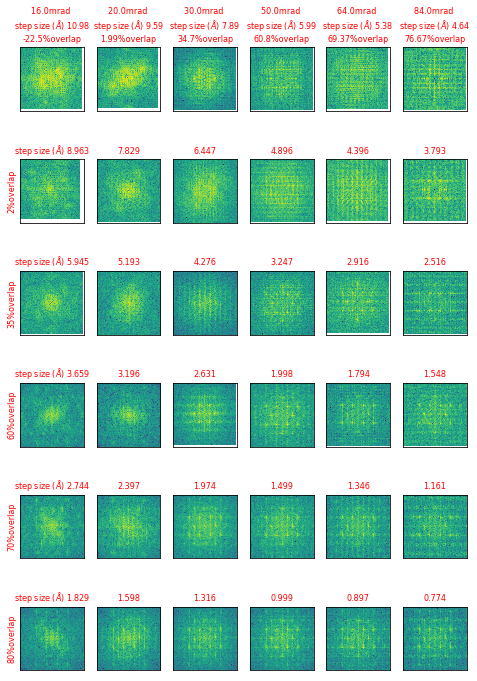

In [9]:
# focused probe cases - fft only
rows = len(defocus_probes_dict[0])
cols = len(conv_angles)
#print(rows, cols)
fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True,figsize=(8, 12))
#fig.suptitle('Focused probe conditions', fontsize = 12)

for idx in range(rows):    
      for idy in range(cols): 
            obj = crop_recon_obj(focus_probes_dict[idy][idx]['json_path'])
            #print(idx, idy)
            j_dict = j_dict = json_to_dict(focus_probes_dict[idy][idx]['json_path'])
            axs[idx,idy].imshow(np.log(abs(get_fft(obj))), cmap = 'viridis')
            axs[idx,idy].set_xticks([])
            axs[idx,idy].set_yticks([])
            if idx == 0:
                axs[idx,idy].set_title(str(1e3 * j_dict['process']['common']['probe']['convergence']) + 'mrad \n' + \
                    'step size ($\AA$) %2.2f'%(1e10*j_dict['process']['common']['scan']['dR'][0]) + '\n' + \
                                       str(diff_overlap[idy]) + '%overlap', color = 'red', fontsize = 8)
            elif idy == 0:
                axs[idx,idy].set_title('step size ($\AA$) %2.3f'%(1e10*j_dict['process']['common']['scan']['dR'][0]), color = 'red', fontsize = 8)
                axs[idx, idy].set_ylabel(str(real_probe_overlap[idx]) + '%overlap', color = 'red', fontsize = 8)
            else:
                axs[idx,idy].set_title('%2.3f'%(1e10*j_dict['process']['common']['scan']['dR'][0]), color = 'red', fontsize = 8)
#plt.tight_layout()

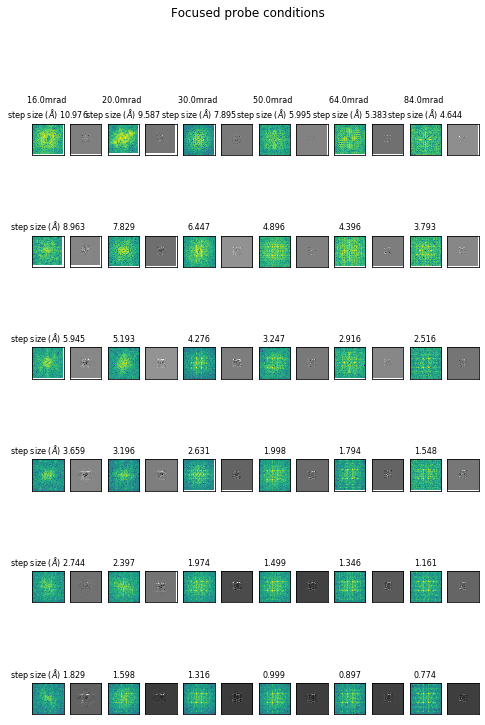

In [10]:
# focused probe cases - fft and obj phase

rows = len(defocus_probes_dict[0])
cols = len(conv_angles) * 2
#print(rows, cols)
fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True,figsize=(8, 12))
fig.suptitle('Focused probe conditions', fontsize = 12)

for idx in range(rows):    
      for idy in range(cols): 
            obj = crop_recon_obj(focus_probes_dict[int(idy / 2)][idx]['json_path'])
            #print(idx, idy)
            j_dict = j_dict = json_to_dict(focus_probes_dict[int(idy / 2)][idx]['json_path'])
            if idy % 2 == 0:
                axs[idx,idy].imshow(np.log(abs(get_fft(obj))), cmap = 'viridis')
                axs[idx,idy].set_xticks([])
                axs[idx,idy].set_yticks([])
                if idx == 0:
                    axs[idx,idy].set_title(str(1e3 * j_dict['process']['common']['probe']['convergence']) + 'mrad \n' + \
                        'step size ($\AA$) %2.3f'%(1e10*j_dict['process']['common']['scan']['dR'][0]), fontsize = 8)
                elif idy == 0:
                    axs[idx,idy].set_title('step size ($\AA$) %2.3f'%(1e10*j_dict['process']['common']['scan']['dR'][0]), fontsize = 8)
                else:
                    axs[idx,idy].set_title('%2.3f'%(1e10*j_dict['process']['common']['scan']['dR'][0]), fontsize = 8)
               
            else:
                sh = obj.shape[0] /2
                crop = 200 / 2
                axs[idx,idy].imshow(np.angle(obj), cmap = 'gray')
                axs[idx,idy].set_xticks([])
                axs[idx,idy].set_yticks([])

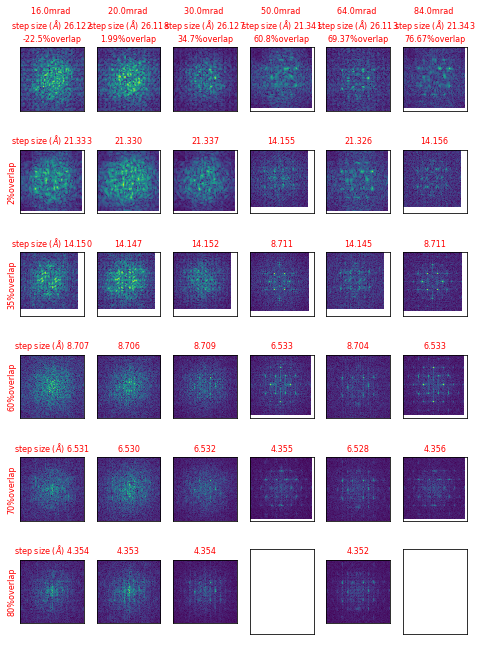

In [11]:
# defocused probe cases - fft only
rows = len(defocus_probes_dict[0])
cols = len(conv_angles)
#print(rows, cols)
fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True,figsize=(8, 11))
for idx in range(rows):    
      for idy in range(cols): 
            try:
                obj = crop_recon_obj(defocus_probes_dict[idy][idx]['json_path'])
                #print(idx, idy)
                j_dict = j_dict = json_to_dict(defocus_probes_dict[idy][idx]['json_path'])
                axs[idx,idy].imshow(np.sqrt(abs(get_fft(obj))), cmap = 'viridis')
                axs[idx,idy].set_xticks([])
                axs[idx,idy].set_yticks([])
                if idx == 0:
                    axs[idx,idy].set_title(str(1e3 * j_dict['process']['common']['probe']['convergence']) + 'mrad \n' + \
                        'step size ($\AA$) %2.3f'%(1e10*j_dict['process']['common']['scan']['dR'][0])+ '\n' + \
                                       str(diff_overlap[idy]) + '%overlap', color = 'red', fontsize = 8)
                elif idy == 0:
                    axs[idx,idy].set_title('step size ($\AA$) %2.3f'%(1e10*j_dict['process']['common']['scan']['dR'][0]), color = 'red', fontsize = 8)
                    axs[idx, idy].set_ylabel(str(real_probe_overlap[idx]) + '%overlap', color = 'red', fontsize = 8)
                else:
                    axs[idx,idy].set_title('%2.3f'%(1e10*j_dict['process']['common']['scan']['dR'][0]), color = 'red', fontsize = 8)
            except IndexError:
                pass
#plt.tight_layout()            

# Comparison with sim potential

In [9]:
# we get one of the potentials as ground truth to compare the recons with.
focus_probes_dict[4][5]['sim_path']

'/dls/e02/data/2020/cm26481-1/processing/pty_simulated_data_MD/sim_matrix_ptyREX_v2/Graphene_defect_32.0mrad_0.00A_def_0.90A_step_size/Graphene_defect_32.0mrad_0.00A_def_0.90A_step_size.h5'

In [10]:
pot = get_potential(focus_probes_dict[4][5]['sim_path'])

Text(0.5, 1.0, 'ideal phase shift')

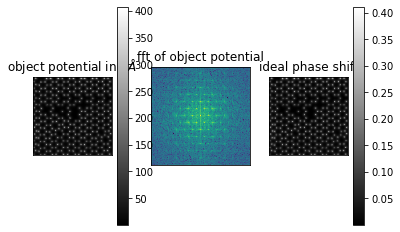

In [11]:
sh = pot.shape[0]
obj_pot = pot[int(0.33*sh):int(0.66*sh), int(0.33*sh):int(0.66*sh)]
obj_pot_fft = np.fft.fftshift(np.fft.fft2(obj_pot))
phase_ideal = _sigma(80000) * obj_pot
fig, ax = plt.subplots(1,3)
im = ax[0].imshow(obj_pot)
fig.colorbar(im, ax = ax[0])
ax[1].imshow(np.log(abs(obj_pot_fft)), cmap = 'viridis')
im2 = ax[2].imshow(phase_ideal)
fig.colorbar(im2, ax = ax[2])
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[0].set_title('object potential in V$\AA$')
ax[1].set_title('fft of object potential')
ax[2].set_title('ideal phase shift')
# plt.tight_layout()            

In [12]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import normalized_root_mse as nrmse
from skimage.metrics import mean_squared_error as mse
from skimage.feature import register_translation
from scipy.ndimage import fourier_shift


In [13]:
# binning the ideal phase by 2 - the sim pixelSize is half the recn pixelSize - due to the way 4DSTEM
# data is saved in pyprimsatic
phase_ideal_hs = hs.signals.Signal2D(phase_ideal)
phase_ideal_bin = phase_ideal_hs.rebin(scale = (2,2))
phase_ideal_bin = phase_ideal_bin.data

/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  from ipykernel import kernelapp as app
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/numpy/core/_methods.py:151: ComplexWarning: Casting complex values to real discards the imaginary part
  ret = umr_sum(arr, axis, dtype, out, keepdims)


case number:  0
Graphene_defect_8.0mrad_0.00A_def_10.98A_step_size.h5
case number:  1
Graphene_defect_8.0mrad_0.00A_def_8.96A_step_size.h5
case number:  2
Graphene_defect_8.0mrad_0.00A_def_5.95A_step_size.h5
case number:  3
Graphene_defect_8.0mrad_0.00A_def_3.66A_step_size.h5
case number:  4
Graphene_defect_8.0mrad_0.00A_def_2.74A_step_size.h5
case number:  5
Graphene_defect_8.0mrad_0.00A_def_1.83A_step_size.h5
case number:  6
Graphene_defect_10.0mrad_0.00A_def_9.59A_step_size.h5
case number:  7
Graphene_defect_10.0mrad_0.00A_def_7.83A_step_size.h5
case number:  8
Graphene_defect_10.0mrad_0.00A_def_5.19A_step_size.h5
case number:  9
Graphene_defect_10.0mrad_0.00A_def_3.20A_step_size.h5
case number:  10
Graphene_defect_10.0mrad_0.00A_def_2.40A_step_size.h5
case number:  11
Graphene_defect_10.0mrad_0.00A_def_1.60A_step_size.h5
case number:  12
Graphene_defect_15.0mrad_0.00A_def_7.89A_step_size.h5
case number:  13
Graphene_defect_15.0mrad_0.00A_def_6.45A_step_size.h5
case number:  14
Grap

/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


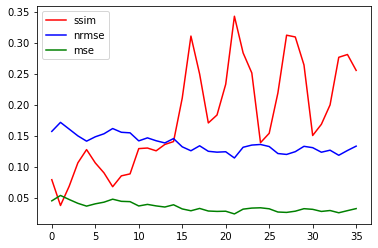

In [14]:
ssim_scores = []
nrmse_scores = []
mse_scores = []
case_num = 0
for i in range(6):
    for n in range(len(focus_probes_dict[i])):
        obj = crop_recon_obj(focus_probes_dict[i][n]['json_path'])
        img = abs(np.min(np.angle(obj))) + np.angle(obj)
        sh0 = img.shape[0]
        sh1 = phase_ideal_bin.shape[0]
        img_crop = img[int(sh0/2 - sh1/2):int(sh0/2 + sh1/2), int(sh0/2 - sh1/2):int(sh0/2 + sh1/2)]
        shift, error, diffphase = register_translation(phase_ideal_bin, img_crop)
        offset_img = fourier_shift(np.fft.fftn(img_crop), shift)
        offset_img = np.fft.ifftn(offset_img)
        ssim_score = ssim(phase_ideal_bin, offset_img)
        nrmse_score = nrmse(phase_ideal_bin, offset_img, normalization= 'min-max')
        mse_score = mse(phase_ideal_bin, offset_img)
        ssim_scores.append(ssim_score)
        nrmse_scores.append(nrmse_score)
        mse_scores.append(mse_score)
        print('case number: ', case_num)
        case_num += 1
        print(os.path.basename(focus_probes_dict[i][n]['sim_path']))

plt.figure()
plt.plot(ssim_scores,'r-', label = 'ssim')
plt.plot(nrmse_scores, 'b-', label = 'nrmse')
plt.plot(mse_scores, 'g-', label = 'mse')
plt.legend(loc = 'upper left')

/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  from ipykernel import kernelapp as app
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/numpy/core/_methods.py:151: ComplexWarning: Casting complex values to real discards the imaginary part
  ret = umr_sum(arr, axis, dtype, out, keepdims)


case number:  0
Graphene_defect_8.0mrad_281.70A_def_26.12A_step_size.h5
case number:  1
Graphene_defect_8.0mrad_281.70A_def_21.33A_step_size.h5
case number:  2
Graphene_defect_8.0mrad_281.70A_def_14.15A_step_size.h5
case number:  3
Graphene_defect_8.0mrad_281.70A_def_8.71A_step_size.h5
case number:  4
Graphene_defect_8.0mrad_281.70A_def_6.53A_step_size.h5
case number:  5
Graphene_defect_8.0mrad_281.70A_def_4.35A_step_size.h5
case number:  6
Graphene_defect_10.0mrad_261.50A_def_26.12A_step_size.h5
case number:  7
Graphene_defect_10.0mrad_261.50A_def_21.33A_step_size.h5
case number:  8
Graphene_defect_10.0mrad_261.50A_def_14.15A_step_size.h5
case number:  9
Graphene_defect_10.0mrad_261.50A_def_8.71A_step_size.h5
case number:  10
Graphene_defect_10.0mrad_261.50A_def_6.53A_step_size.h5
case number:  11
Graphene_defect_10.0mrad_261.50A_def_4.35A_step_size.h5
case number:  12
Graphene_defect_15.0mrad_223.60A_def_26.13A_step_size.h5
case number:  13
Graphene_defect_15.0mrad_223.60A_def_21.34A

/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


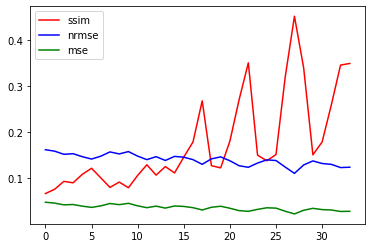

In [15]:
ssim_scores = []
nrmse_scores = []
mse_scores = []
case_num = 0
for i in range(6):
    for n in range(len(defocus_probes_dict[i])):
        obj = crop_recon_obj(defocus_probes_dict[i][n]['json_path'])
        img = abs(np.min(np.angle(obj))) + np.angle(obj)
        sh0 = img.shape[0]
        sh1 = phase_ideal_bin.shape[0]
        img_crop = img[int(sh0/2 - sh1/2):int(sh0/2 + sh1/2), int(sh0/2 - sh1/2):int(sh0/2 + sh1/2)]
        shift, error, diffphase = register_translation(phase_ideal_bin, img_crop)
        offset_img = fourier_shift(np.fft.fftn(img_crop), shift)
        offset_img = np.fft.ifftn(offset_img)
        ssim_score = ssim(phase_ideal_bin, offset_img)
        nrmse_score = nrmse(phase_ideal_bin, offset_img, normalization= 'min-max')
        mse_score = mse(phase_ideal_bin, offset_img)
        ssim_scores.append(ssim_score)
        nrmse_scores.append(nrmse_score)
        mse_scores.append(mse_score)
        print('case number: ', case_num)
        case_num += 1
        print(os.path.basename(defocus_probes_dict[i][n]['sim_path']))

plt.figure()
plt.plot(ssim_scores,'r-', label = 'ssim')
plt.plot(nrmse_scores, 'b-', label = 'nrmse')
plt.plot(mse_scores, 'g-', label = 'mse')
plt.legend(loc = 'upper left')


In [16]:
offset_img_r = np.real(offset_img)

In [17]:
ratio = np.divide(offset_img_r, phase_ideal_bin)

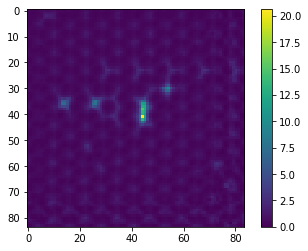

In [22]:
plt.figure()
plt.imshow(ratio, cmap = 'viridis')
plt.colorbar()
ratio_mean = np.mean(ratio)

In [19]:
ratio_mean

0.6880313686764836

In [20]:
np.sqrt(0.5)

0.7071067811865476

/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/numpy/core/_methods.py:151: ComplexWarning: Casting complex values to real discards the imaginary part
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:85: Co

Text(0.5, 0.98, 'ssim and nrmse scores as function of convergence angle \n defocused probe cases')

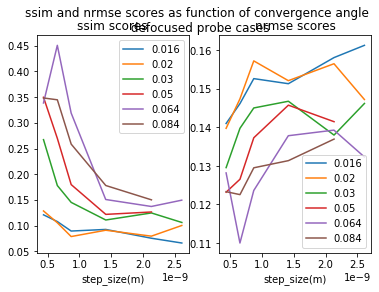

In [23]:
ssim_scores = []
nrmse_scores = []
mse_scores = []
case_num = 0
convergence = []
step_size = []
for i in range(6):
    for n in range(len(defocus_probes_dict[i])):
        obj = crop_recon_obj(defocus_probes_dict[i][n]['json_path'])
        convergence.append(defocus_probes_dict[i][n]['process']['common']['probe']['convergence'])
        step_size.append(defocus_probes_dict[i][n]['process']['common']['scan']['dR'][0])
        img = abs(np.min(np.angle(obj))) + np.angle(obj)
        sh0 = img.shape[0]
        sh1 = phase_ideal_bin.shape[0]
        img_crop = img[int(sh0/2 - sh1/2):int(sh0/2 + sh1/2), int(sh0/2 - sh1/2):int(sh0/2 + sh1/2)]
        shift, error, diffphase = register_translation(phase_ideal_bin, img_crop)
        offset_img = fourier_shift(np.fft.fftn(img_crop), shift)
        offset_img = np.fft.ifftn(offset_img)
        ssim_score = ssim(phase_ideal_bin, offset_img)
        nrmse_score = nrmse(phase_ideal_bin, offset_img, normalization= 'min-max')
        mse_score = mse(phase_ideal_bin, offset_img)
        ssim_scores.append(ssim_score)
        nrmse_scores.append(nrmse_score)
        mse_scores.append(mse_score)

conv_angles = [0.016, 0.020, 0.030, 0.050, 0.064, 0.084]
convergence = np.asarray(convergence)
fig, ax = plt.subplots(1,2)
for angle in conv_angles:
    inds = np.where(convergence==angle)
    _steps = np.take(step_size, inds[0])
    _ssim = np.take(ssim_scores, inds[0])
    _nrmse = np.take(nrmse_scores, inds[0])
    _mse = np.take(mse_scores, inds[0])

    ax[0].plot(_steps, _ssim,label = str(angle))
    ax[0].set_title('ssim scores')
    ax[0].set_xlabel('step_size(m)')
    ax[1].plot(_steps, _nrmse,label = str(angle))
    ax[1].set_title('nrmse scores')
    ax[1].set_xlabel('step_size(m)')
    ax[0].legend()
    ax[1].legend()
fig.suptitle('ssim and nrmse scores as function of convergence angle \n defocused probe cases')

/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/numpy/core/_methods.py:151: ComplexWarning: Casting complex values to real discards the imaginary part
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:85: Co

Text(0.5, 0.98, 'ssim and nrmse scores as function of convergence angle \n focused probe cases')

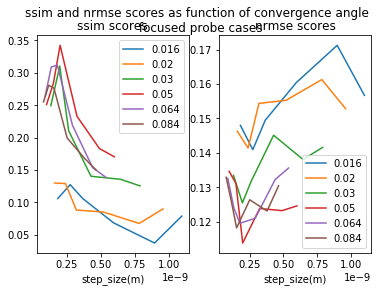

In [24]:
ssim_scores = []
nrmse_scores = []
mse_scores = []
case_num = 0
convergence = []
step_size = []
for i in range(6):
    for n in range(len(focus_probes_dict[i])):
        obj = crop_recon_obj(focus_probes_dict[i][n]['json_path'])
        convergence.append(focus_probes_dict[i][n]['process']['common']['probe']['convergence'])
        step_size.append(focus_probes_dict[i][n]['process']['common']['scan']['dR'][0])
        img = abs(np.min(np.angle(obj))) + np.angle(obj)
        sh0 = img.shape[0]
        sh1 = phase_ideal_bin.shape[0]
        img_crop = img[int(sh0/2 - sh1/2):int(sh0/2 + sh1/2), int(sh0/2 - sh1/2):int(sh0/2 + sh1/2)]
        shift, error, diffphase = register_translation(phase_ideal_bin, img_crop)
        offset_img = fourier_shift(np.fft.fftn(img_crop), shift)
        offset_img = np.fft.ifftn(offset_img)
        ssim_score = ssim(phase_ideal_bin, offset_img)
        nrmse_score = nrmse(phase_ideal_bin, offset_img, normalization= 'min-max')
        mse_score = mse(phase_ideal_bin, offset_img)
        ssim_scores.append(ssim_score)
        nrmse_scores.append(nrmse_score)
        mse_scores.append(mse_score)

conv_angles = [0.016, 0.020, 0.030, 0.050, 0.064, 0.084]
convergence = np.asarray(convergence)
fig, ax = plt.subplots(1,2)
for angle in conv_angles:
    inds = np.where(convergence==angle)
    _steps = np.take(step_size, inds[0])
    _ssim = np.take(ssim_scores, inds[0])
    _nrmse = np.take(nrmse_scores, inds[0])
    _mse = np.take(mse_scores, inds[0])

    ax[0].plot(_steps, _ssim,label = str(angle))
    ax[0].set_title('ssim scores')
    ax[0].set_xlabel('step_size(m)')
    ax[1].plot(_steps, _nrmse,label = str(angle))
    ax[1].set_title('nrmse scores')
    ax[1].set_xlabel('step_size(m)')
    ax[0].legend()
    ax[1].legend()
fig.suptitle('ssim and nrmse scores as function of convergence angle \n focused probe cases')

Text(0.5, 0.98, 'probe convergence 0.064rad')

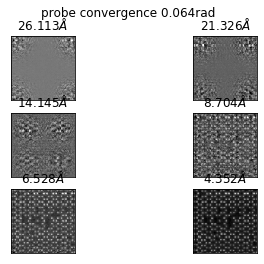

In [25]:
# To plot objects as a function of convergence angles
conv_angles = np.array([0.016, 0.020, 0.030, 0.050, 0.064, 0.084])
angle = 0.064
ind = np.where(conv_angles==angle)

objects = []
step_sizes = []
sh1 = 84
for json_dict in defocus_probes_dict[ind[0][0]]:
    step_size = json_dict['process']['common']['scan']['dR'][0]
    step_sizes.append(step_size)
    obj = crop_recon_obj(json_dict['json_path'])
    img = abs(np.min(np.angle(obj))) + np.angle(obj)
    sh0 = img.shape[0]
    img_crop = img[int(sh0/2 - sh1/2):int(sh0/2 + sh1/2), int(sh0/2 - sh1/2):int(sh0/2 + sh1/2)]
    objects.append(img_crop)
fig, ax = plt.subplots(3,2)
for i, step in enumerate(step_sizes):

    ax[int(i / 2), i%2].imshow(objects[i])
    ax[int(i / 2), i%2].set_title('%2.3f'%(1e10*step)+'$\AA$' )

    ax[int(i / 2), i%2].set_xticks([])
    ax[int(i / 2), i%2].set_yticks([])
fig.suptitle('probe convergence ' + str(angle)+ 'rad')